In [1]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import gensim
import gensim.corpora as corpora
##import yfinance as yf
import re
import requests
from bs4 import BeautifulSoup
#import reticker
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from itertools import chain
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("wsb_updated.csv")

In [3]:
df.head()

,score,comms_num,timestamp,original_text,text,length,GME,AMC,BB,NOK,TSLA,neg,neu,pos,compound,neg_,neu_,pos_,compound_,lexical_diversity
0,0,47,2021-01-28 21:30:35,Exit the system The CEO of NASDAQ pushed to ha...,exit system ceo nasdaq pushed halt trading giv...,1335,1,0,0,0,0,0.072,0.801,0.127,0.8260,0.069,0.755,0.176,0.9491,0.030675
1,71,156,2021-01-28 21:26:56,"Not to distract from GME, just thought our AMC...",distract gme thought amc brothers aware,80,0,1,0,0,0,0.306,0.694,0.000,-0.2960,0.306,0.694,0.000,-0.2960,0.410256
2,200,161,2021-01-28 21:19:16,Currently Holding AMC and NOK - Is it retarded...,currently holding amc nok retarded think move ...,95,1,1,0,1,0,0.316,0.684,0.000,-0.5719,0.316,0.684,0.000,-0.5719,0.327273
3,222,70,2021-01-28 21:18:25,"We need to keep this movement going, we all ca...",need keep movement going make history believe ...,786,0,1,0,0,0,0.135,0.613,0.252,0.8271,0.154,0.534,0.312,0.9287,0.050847
4,562,97,2021-01-28 21:17:28,GME Premarket 🍁 Musk approved 🎮🛑💎✋,gme premarket musk approved,35,1,0,0,0,0,0.000,0.517,0.483,0.4215,0.000,0.517,0.483,0.4215,0.518519


(-0.5, 399.5, 199.5, -0.5)

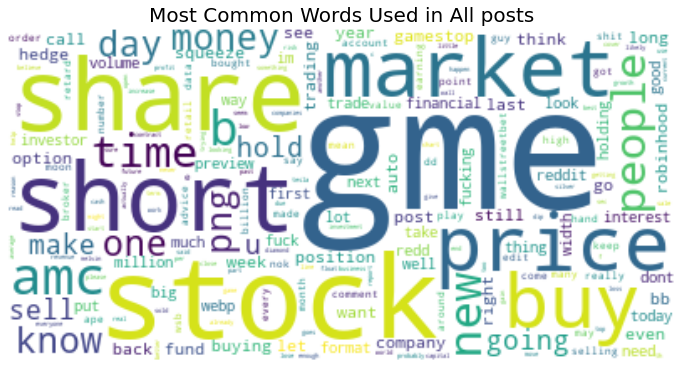

In [4]:
text = ' '.join(df["text"])
# Creating Word Cloud
title_wc = WordCloud(background_color='white', collocations = False).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(title_wc, interpolation='bilinear')
plt.title('Most Common Words Used in All posts', fontsize = 20)
plt.axis('off')

In [5]:
##creating dataset for positive posts
pos_cond = df["compound_"] >= 0.02
df_pos = pd.DataFrame(df[pos_cond]).reset_index()
pos_text = ' '.join(df_pos["text"])

In [6]:
##creating dataset for negative and positive posts
neg_cond = df["compound_"] < 0.2
df_neg = pd.DataFrame(df[neg_cond]).reset_index()
neg_text = ' '.join(df_neg["text"])

(-0.5, 399.5, 199.5, -0.5)

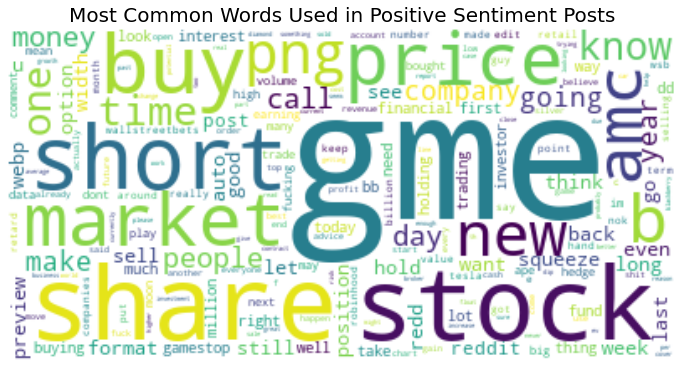

In [7]:
# Creating Word Cloud
title_wc = WordCloud(background_color='white', collocations = False).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(title_wc, interpolation='bilinear')
plt.title('Most Common Words Used in Positive Sentiment Posts', fontsize = 20)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

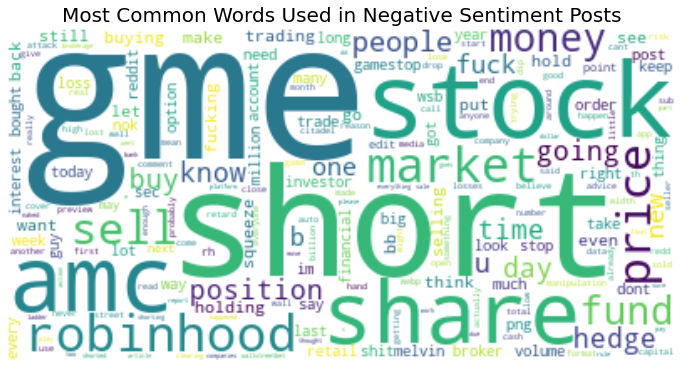

In [8]:
# Creating Word Cloud
title_wc = WordCloud(background_color='white', collocations = False).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(title_wc, interpolation='bilinear')
plt.title('Most Common Words Used in Negative Sentiment Posts', fontsize = 20)
plt.axis('off')

In [9]:
pos_words=df_pos["text"].tolist()
neg_words=df_neg["text"].tolist()

In [10]:
def topic_top_words(vect,lda,k):
    '''
    output top k words for each topic
    '''
    sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
    feature_names = np.array(vect.get_feature_names())
    
    topics=[]
    
    for i in range(len(sorting)):
        topic=feature_names[sorting[i,:k]]
        non_dup=True
        for topic_old in topics:#not adding duplicate topic
            if np.array_equal(topic_old,topic):
                non_dup=False
        if non_dup==True:
            topics.append(topic)
        
    return topics



def LDA_feature_generator(bards_words, n_components, k_words):
    
    '''
    generator a central topic of a post from n_components showing k_words each topic
    
    '''
    
    #vetorizer
    vect = CountVectorizer()
    vect.fit(bards_words)
    bag_of_words = vect.transform(bards_words)
    
    #LDA
    lda = LatentDirichletAllocation(n_components=n_components, learning_method="online", random_state=0)
    lda.fit_transform(bag_of_words)
    
    
    #topic words generation
    topics=topic_top_words(vect,lda,k_words)#call func: topic_top_words
    

    return topics

In [11]:
##LDA_feature_generator(pos_words, 3, 5)

In [12]:
##LDA_feature_generator(neg_words, 3, 5)

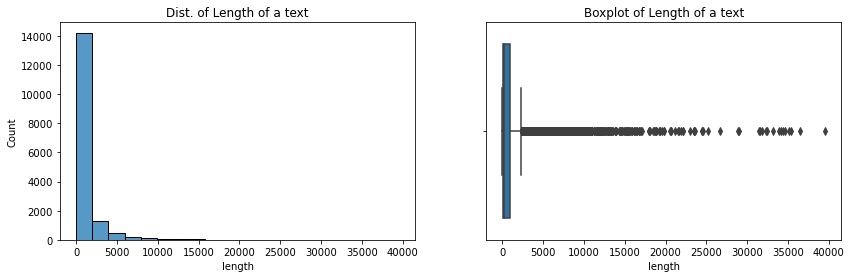

AttributeError: 'numpy.ndarray' object has no attribute 'set_xscale'

In [117]:
import seaborn as sns
from numpy import percentile

fig, axes = plt.subplots(1,2, figsize=(14,4))
sns.histplot(x=df["length"], data=df, bins=20, ax=axes[0])
axes[0].set_title("Dist. of Length of a text")

sns.boxplot(x=df["length"], data=df, ax=axes[1])
axes[1].set_title("Boxplot of Length of a text")
plt.show()

axes.set_xscale('log')
axes.set_yscale('log')

IndexError: index 2 is out of bounds for axis 0 with size 2

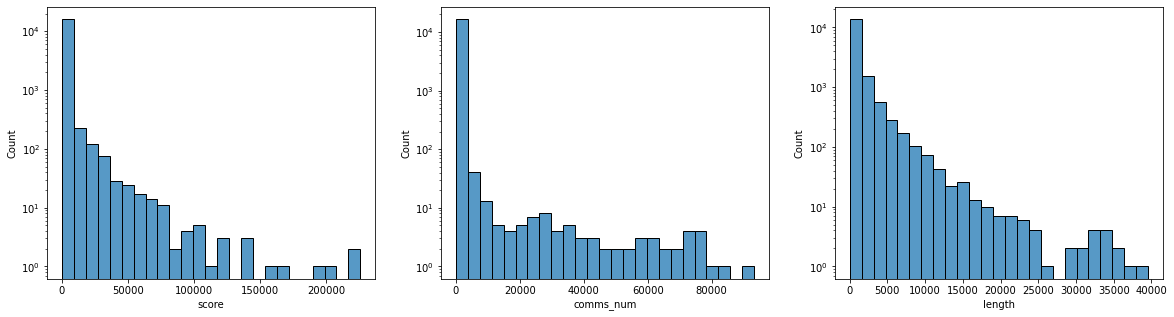

In [131]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')
sns.histplot(x=df['score'], data=df, bins = 25, ax = ax[0])
axes[0].set_title("Log Dist. of Upvote Score")

sns.histplot(x=df['comms_num'],data=df,  bins = 25, ax = ax[1])
axes[1].set_title("Log Dist. of Comments")

sns.histplot(x=df['length'], data=df, bins = 25, ax = ax[2])
axes[2].set_title("Log Dist. of Length")
plt.show()

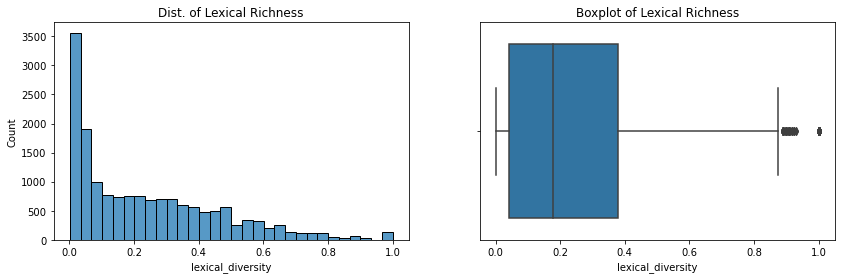

In [15]:
import seaborn as sns
from numpy import percentile

fig, axes = plt.subplots(1,2, figsize=(14,4))

sns.histplot(x=df["lexical_diversity"], data=df, bins=30, ax=axes[0])
axes[0].set_title("Dist. of Lexical Richness")


sns.boxplot(x=df["lexical_diversity"], data=df, ax=axes[1])
axes[1].set_title("Boxplot of Lexical Richness")
plt.show()

In [69]:
scores = {"neg":0, "neu":0, "11-100":0, "pos":0}

for i in df["compound"]:
    if i < -0.2:
        scores["neg"] += 1
    elif i < 0.2:
        scores["neu"] += 1
    else:
        scores["pos"] += 1
        
scores_ = {"neg_":0, "neu_":0, "pos_":0}

for i in df["compound_"]:
    if i < -0.2:
        scores_["neg_"] += 1
    elif i < 0.2:
        scores_["neu_"] += 1
    else:
        scores_["pos_"] += 1

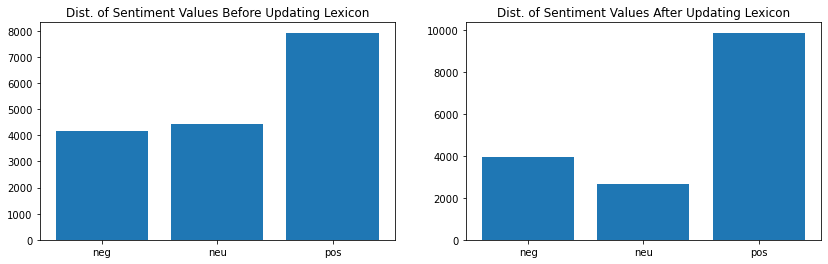

In [86]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(14,4))
axs[0].set_title("Dist. of Sentiment Values Before Updating Lexicon")
score_label = ["neg", "neu", "pos"]
value = [scores["neg"], scores["neu"], scores["pos"]]
axs[0].bar(score_label, value)

axs[1].set_title("Dist. of Sentiment Values After Updating Lexicon")
score_label = ["neg", "neu", "pos"]
value = [scores_["neg_"], scores_["neu_"], scores_["pos_"]]
axs[1].bar(score_label, value)
plt.show()

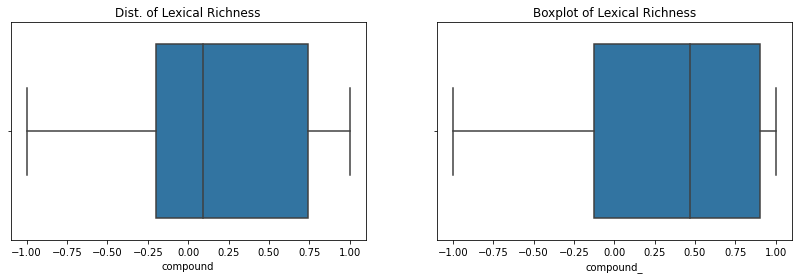

In [88]:
import seaborn as sns
from numpy import percentile

fig, axes = plt.subplots(1,2, figsize=(14,4))

sns.boxplot(x=df["compound"], data=df, ax=axes[0])
axes[0].set_title("Dist. of Lexical Richness")


sns.boxplot(x=df["compound_"], data=df, ax=axes[1])
axes[1].set_title("Boxplot of Lexical Richness")
plt.show()

In [236]:
text=list(df['text'])
words = [nltk.word_tokenize(t) for t in text]
word=[w for word in words for w in word]

In [237]:
fdist=nltk.FreqDist(w for w in word)

In [238]:
fdist.most_common(20)

[('gme', 23339),
 ('stock', 10600),
 ('shares', 10230),
 ('short', 9714),
 ('com', 8929),
 ('market', 8532),
 ('buy', 8510),
 ('amc', 8496),
 ('price', 8350),
 ('like', 8079),
 ('b', 6886),
 ('money', 5968),
 ('people', 5959),
 ('get', 5914),
 ('png', 5790),
 ('would', 5451),
 ('know', 5373),
 ('www', 5346),
 ('going', 5315),
 ('time', 5297)]

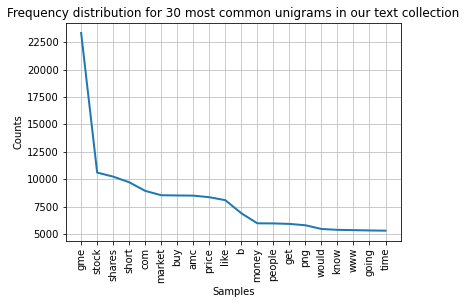

<AxesSubplot:title={'center':'Frequency distribution for 30 most common unigrams in our text collection'}, xlabel='Samples', ylabel='Counts'>

In [239]:
fdist.plot(20,title='Frequency distribution for 30 most common unigrams in our text collection')

In [240]:
unigrams = [item[0] for item in fdist.most_common(20)]
frquni = [item[1] for item in fdist.most_common(20)]

Text(0, 0.5, 'Unigrams')

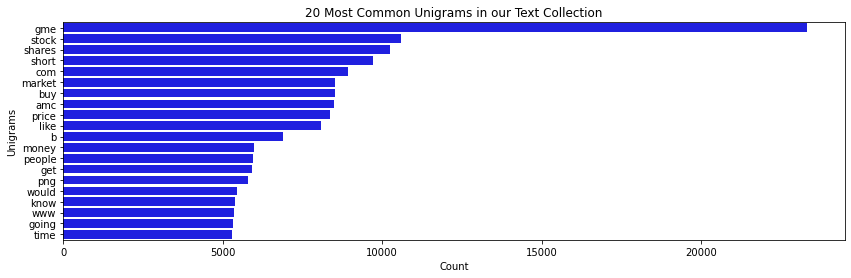

In [241]:
plt.figure(figsize=(14, 4))
sns.barplot(y=unigrams, x=frquni, color="blue").set(title='20 Most Common Unigrams in our Text Collection')
plt.xlabel("Count")
plt.ylabel("Unigrams")

In [242]:
text=list(df['text'])
words = [nltk.word_tokenize(t) for t in text]
word=[w for word in words for w in word]
fdist=nltk.FreqDist((x,y) for (x,y) in nltk.bigrams(word))

In [243]:
most_common=fdist.most_common(20)

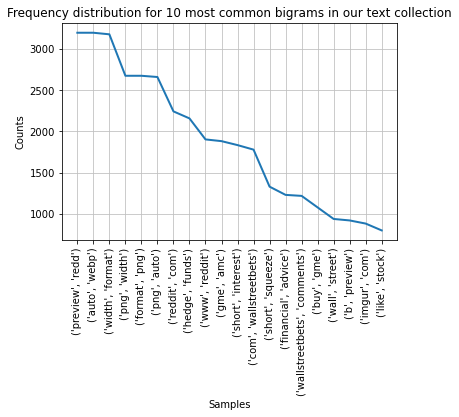

<AxesSubplot:title={'center':'Frequency distribution for 10 most common bigrams in our text collection'}, xlabel='Samples', ylabel='Counts'>

In [244]:
fdist.plot(20,title='Frequency distribution for 10 most common bigrams in our text collection')

In [245]:
top_words=[word for (word, freq) in most_common]
frqbi = [freq for (word, freq) in most_common]
bigrams = [' '.join(i) for i in top_words]

Text(0, 0.5, 'Bigrams')

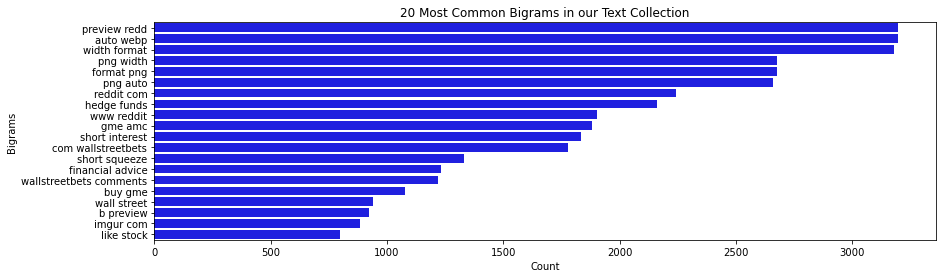

In [246]:
plt.figure(figsize=(14, 4))
sns.barplot(y=bigrams, x=frqbi, color="blue").set(title='20 Most Common Bigrams in our Text Collection')
plt.xlabel("Count")
plt.ylabel("Bigrams")

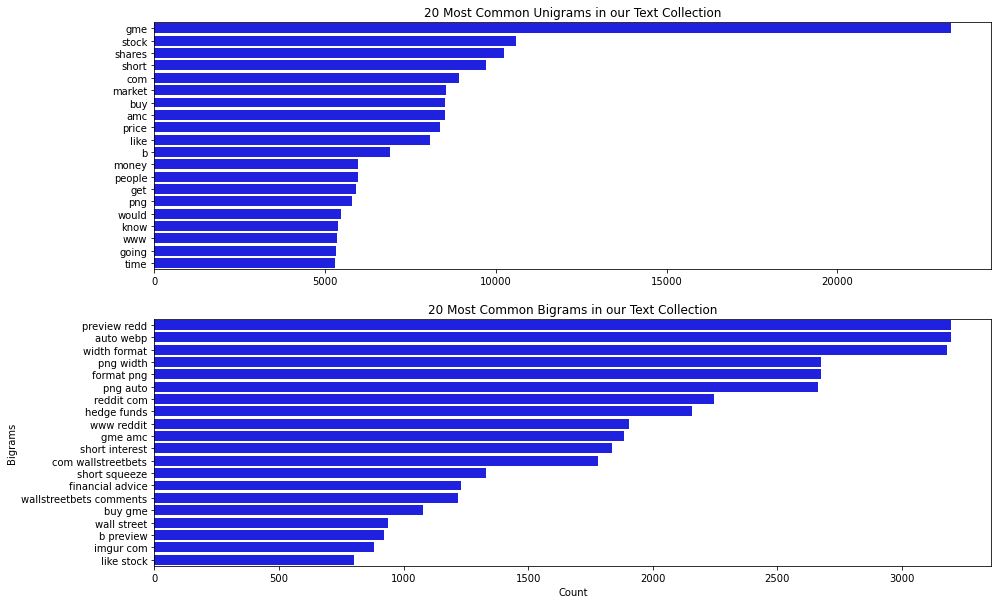

In [264]:
fig, axes = plt.subplots(2,1, figsize=(15,10))

sns.barplot(y=unigrams, x=frquni, color="blue", ax=axes[0]).set(title='20 Most Common Unigrams in our Text Collection')
plt.xlabel("Count")
plt.ylabel("Unigrams")

sns.barplot(y=bigrams, x=frqbi, color="blue", ax=axes[1]).set(title='20 Most Common Bigrams in our Text Collection')
plt.xlabel("Count")
plt.ylabel("Bigrams")

plt.show()